# Business Problem
- About: Customer Churn is defined when a customer chooses to stop using the products or services of an organization. Every churn has a direct impact on company operations (revenues, costs, profit, etc.).

- Business Need: Implement a strategy for tracking customer journey, identifying patterns related to churn, predicting who is likely to churn, take pre-emptive actions to prevent future churns.

- Key Business Metrics: % total customer churn per year, % total revenue saved due to churn, % total customer churn per year

# Business Value
The deployed model can be used to generate useful and relevant business insights such as - which customers are most likely to churn, which regions/attributes are associated with high (and low) risk of churn, what is the overall distribution of current customers, and their churn probabilities, What is the percent change in the overall churn rate before and after model deployment. The important metrics should be properly quantified, visualized, and communicated using effective data storytelling.

## Model Explainability:

Focus on explaining what are the top attributes related to customer churn (feature importance), what contributes to the high (or low) value of customer churn, Why a model makes particular decisions. This includes the use of surrogate modeling techniques - LIME, PDP, or SHAP

# Download Data from Kaggle

About [data](https://www.kaggle.com/code/aasthagarg/churn-analysis-in-e-commerce):
- Customer Demographics: Gender, City Tier, Marital Status.
- Shopping Preferences: Preferred Login Device, Preferred Payment Mode, Preferred Order Categories.
- Engagement Metrics: Hours Spent on App, Number of Devices Registered, Satisfaction Score.
- Transactional Behavior: Order Amount Hike from Last Year, Number of Addresses, Frequency of Coupon Usage


In [ ]:
!kaggle datasets download -d ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
!unzip ecommerce-customer-churn-analysis-and-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
License(s): CC-BY-NC-SA-4.0
100% 532k/532k [00:00<00:00, 704kB/s]
100% 532k/532k [00:00<00:00, 704kB/s]
Archive:  ecommerce-customer-churn-analysis-and-prediction.zip
  inflating: E Commerce Dataset.xlsx  


In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import seaborn as sns
from scipy.stats import chi2
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
EC = pd.read_excel("E Commerce Dataset.xlsx", sheet_name=1)
EC.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# Check duplicate
EC.duplicated().sum()

0

In [4]:
# Check null
EC.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
# Replace null with median
for column in EC.columns:
    if EC[column].isnull().sum()>0:
        EC[column].fillna(EC[column].median(),inplace=True)

/tmp/ipykernel_117390/3892926926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EC[column].fillna(EC[column].median(),inplace=True)
/tmp/ipykernel_117390/3892926926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [6]:
EC.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [7]:
# Check column dtype object
for column in EC.columns:
    if EC[column].dtype=='object':
        print( EC[column].value_counts())
        print()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Gender
Male      3384
Female    2246
Name: count, dtype: int64

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64



- Replacing duplicate values in columns PreferredLoginDevice(Phone and Mobile Phone are same),
- PreferredPaymentMode(COD, CC is same as Cash On Delivery and Credit Card),
- PreferedOrderCat(Mobile Phone and Mobile are same)

In [8]:
EC['PreferredLoginDevice'] = EC['PreferredLoginDevice'].replace("Phone","Mobile Phone")
EC['PreferredPaymentMode'] = EC['PreferredPaymentMode'].replace(["CC","COD"],["Credit Card","Cash on Delivery"])
EC['PreferedOrderCat'] = EC['PreferedOrderCat'].replace("Mobile","Mobile Phone")

In [9]:
# Creating an index object of float type columns
float_columns = EC.select_dtypes(include=['float']).columns
print("Float columns are: " + ", ".join(float_columns))
print()

# Creating an index object of String type columns
object_columns = EC.select_dtypes(include=['object']).columns
print("Object columns are: " + ", ".join(object_columns))
print()

# Creating an index object of Ordinal type columns
ordinal_columns = EC[['CityTier','SatisfactionScore', 'Complain' ]].columns
print("Ordinal columns are: " + ", ".join(ordinal_columns))

Float columns are: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount

Object columns are: PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus

Ordinal columns are: CityTier, SatisfactionScore, Complain


# EDA
##### Churn Distribution

In [10]:
churn_counts = EC['Churn'].value_counts()

# Plotting a pie chart
labels = ['No', 'Yes']
colors = [px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[0]]

fig = px.pie(names=labels, values=churn_counts, title='Churn Distribution',
             labels={'names': 'Churn', 'values': 'Count'},
             color_discrete_sequence=colors,
             hover_name=labels,  # Show labels on hover
             hole=0.4)  # Donut hole size (0 for pie, <1 for donut)

# Showing percentage on hover
fig.update_traces(textinfo='percent+label')

# Centering the title
fig.update_layout(title_text='Churn Distribution',
                  title_x=0.5,  # Centered horizontally
                  title_y=0.9,  # Adjust vertical position (0.0 to 1.0 range)
                  title_font_size=20)  # Adjust font size if needed

# Display the plot
fig.show()

The data shows that the majority of customers (83.2%) did not churn, while a smaller percentage (16.8%) did.

Although the churn rate is relatively low, there is still room for improvement. I will analyze the factors contributing to customer churn and develop strategies to reduce these rates.

In [ ]:
# # create heatmap correlation
# plt.figure(figsize=(16,12))
# sns.heatmap(EC.select_dtypes(include=np.number).corr(),annot=True,cmap='Blues')
# plt.show()

##### How does customer tenure influence their likelihood of churn?

In [11]:
avg_tenure = EC.groupby('Churn')['Tenure'].mean().reset_index()

fig = go.Figure()
colors = ['green', 'red']
for i, (churn, tenure) in enumerate(zip(avg_tenure['Churn'], avg_tenure['Tenure'])):
    fig.add_trace(go.Bar(
        x=[str(churn)],
        y=[tenure],
        name=str(churn),
        marker_color=colors[i],
        text=[f'{tenure:.2f}'],
        textposition='outside'
    ))

fig.update_layout(
    title='Average Customer Tenure by Churn',
    xaxis_title='Churn',
    yaxis_title='Average Tenure',
    width=800,
    height=500,
    showlegend=False
)

fig.show()

- Customers who were retained (Churn = 0) have an average tenure of approximately 11.40.
- Customers who churned (Churn = 1) have a significantly lower average tenure of around 3.86.

The bar chart visually illustrates this difference, clearly showing that customers who stay with the service tend to have a longer tenure, while those who leave (churn) typically do so after a shorter duration.

This indicates a strong relationship between tenure and churn, suggesting that customers who engage with the service for a longer period are less likely to churn. This insight can be crucial for developing strategies to enhance customer retention, **such as focusing on early engagement and retention efforts for newer customers**.

In [12]:
# Function to split string at capital letters
def split_on_capitals(text: str):
    new_text = [text[0]]
    for char in text[1:]:
        if char.isupper():
            new_text.append(' ')
        new_text.append(char)
    return ''.join(new_text).title()

split_on_capitals("Function to split string at capital letters")

'Function To Split String At Capital Letters'

### Churn Dynamics - Nominal

In [13]:
fig = go.Figure()

for column in object_columns:
    counts = EC.groupby([column, 'Churn']).size().reset_index(name='count')
    counts = counts.sort_values(by='count', ascending=False)

    # Calculate total counts each category
    totals = counts.groupby(column)['count'].sum().reset_index(name='total_count')
    counts = pd.merge(counts, totals, on=column, suffixes=('', '_total'))
    counts['percentage'] = (counts['count'] / counts['total_count']) * 100
    counts['percentage'] = counts['percentage'].apply(lambda x: f"{x:.2f}")
    counts = counts.sort_values(by=[column, 'Churn'], ascending=[True, False])

    # Create a bar chart for the current column
    for churn_value in counts['Churn'].unique():
        churn_counts = counts[counts['Churn'] == churn_value]
        fig.add_trace(
            go.Bar(
                x=churn_counts[column],
                y=churn_counts['count'],
                name='Yes' if churn_value == True else 'No',
                text=churn_counts['percentage'] + '%',
                hoverinfo='text+y',
                marker=dict(color='red' if churn_value == True else 'lightgreen', opacity=0.45),
                hovertemplate=(
                    f'<b>{column}</b>: %{{x}}<br>' +
                    'Number of Customers: %{y}<br>' +
                    'Percentage: %{text}'
                ),
                visible=False,
                showlegend=True
            )
        )

# Make the first set of traces (one for each Churn value) visible by default
num_churn_values = len(EC['Churn'].unique())
for trace in fig.data[:num_churn_values]:
    trace.visible = True

# Create dropdown buttons for each trace
buttons = []
for i, column in enumerate(object_columns):
    visibility = [False] * len(fig.data)
    start_idx = i * num_churn_values
    for j in range(num_churn_values):
        visibility[start_idx + j] = True
    buttons.append(dict(
        method='update',
        label=split_on_capitals(column),
        args=[{'visible': visibility},
              {'title': f'{split_on_capitals(column)} by Churn Status',
               'xaxis': {'title': split_on_capitals(column)}}]  # Update x-axis title dynamically
               ))


# Add dropdown menu to the layout
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        active=0,
        x=0.80,
        xanchor='left',
        y=1.22,
        yanchor='top'
    )],
    title=f'{split_on_capitals(object_columns[0])} by Churn',
    xaxis_title=split_on_capitals(object_columns[0]),
    yaxis_title='Number of Customers',
    barmode='overlay',
    legend=dict(
        title='Churn'
    ),
    width=1200,  # 12 inches * 100 pixels per inch
    height=800
)

# Display the plot
fig.show()



**Prefered Login Device**
- Customers who prefer using a computer for login have a slightly heigher churn rate (19.83%) compared to those who prefer mobile phones (15.62)
- Mobile user have a higher retention rate.

**Payment Method**
- Cash on Delivery users have the highest churn rate (24.90%), followed by E wallet users (22.80%), and UPI users (17.39%).
- Credit Card and Debit Card users exhibit lower churn rates, at 14.21% and 15.38%, respectively.

**Gender**
- Male customers have a slightly higher churn rate (17.73%) compared to female customers (15.49%).
- Female customers exhibit a higher retention rate (84.51%) than male customers (82.27%). This suggests that gender may play a role in customer churn, with different churn rates observed between male and female customers. **This insight can be important for developing gender-specific customer engagement and retention strategies.**

**Preferred Category:** There is a significant churn rate among users who prefer the mobile category. Strategies should be considered to improve retention in this segment.

**Martial Status**
- Single customers have a significantly higher churn rate (26.73%) compared to married (11.52%) and divorced (14.62%) customers.
- Married customers exhibit the highest retention rate (88.48%). This suggests that marital status is a relevant factor in customer churn, with different marital statuses showing distinct churn behaviors.

### Churn Dynamics - Ordinal

In [14]:
# Initialize a figure
fig = go.Figure()

# Loop through each ordinal column and create a bar chart
for column in ordinal_columns:
    # Count the occurrences of each category and churn combination
    counts = EC.groupby([column, 'Churn']).size().reset_index(name='count')
    counts = counts.sort_values(by='count', ascending=False)

    # Calculate total counts for each category
    totals = counts.groupby(column)['count'].sum().reset_index(name='total_count')
    counts = pd.merge(counts, totals, on=column, suffixes=('', '_total'))
    counts['percentage'] = (counts['count'] / counts['total_count']) * 100
    counts['percentage'] = counts['percentage'].apply(lambda x: f"{x:.2f}")
    counts = counts.sort_values(by=[column, 'Churn'], ascending=[True, False])

    # Create a bar chart for the current column
    for churn_value in counts['Churn'].unique():
        churn_counts = counts[counts['Churn'] == churn_value]
        fig.add_trace(
            go.Bar(
                x=churn_counts[column],
                y=churn_counts['percentage'].astype(float),  # Use percentage for y-values
                name='Yes' if churn_value else 'No',  # Show 'Yes' or 'No' in the legend
                text=churn_counts['percentage'] + '%',
                customdata=churn_counts[['count']].values,  # Pass count values as customdata
                hoverinfo='text+y',
                hovertemplate=(
                    f'<b>{column}</b>: %{{x}}<br>' +
                    'Percentage: %{y:.2f}%<br>' +
                    'Count: %{customdata[0]}<br>'  # Display count from customdata
                ),
                marker=dict(color='red' if churn_value else 'lightgreen', opacity=0.5),
                visible=False,
                showlegend=True
            )
        )

# Make the first set of traces (one for each Churn value) visible by default
num_churn_values = len(EC['Churn'].unique())
for trace in fig.data[:num_churn_values]:
    trace.visible = True

# Create dropdown buttons for each trace
buttons = []
for i, column in enumerate(ordinal_columns):
    visibility = [False] * len(fig.data)
    start_idx = i * num_churn_values
    for j in range(num_churn_values):
        visibility[start_idx + j] = True
    buttons.append(dict(
        method='update',
        label=split_on_capitals(column),
        args=[{'visible': visibility},
              {'title': f'{split_on_capitals(column)} by Churn Status',
               'xaxis': {'title': split_on_capitals(column)},
               'yaxis_title': 'Percentage'}]  # Update y-axis title dynamically
    ))

# Add dropdown menu to the layout
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        active=0,
        x=0.80,
        xanchor='left',
        y=1.22,
        yanchor='top'
    )],
    title=f'{split_on_capitals(ordinal_columns[0])} by Churn Status',
    xaxis_title=split_on_capitals(ordinal_columns[0]),
    yaxis_title='Percentage',
    barmode='group',
    legend=dict(
        title='Churn'
    )
    ,
    width=1200,  # 12 inches * 100 pixels per inch
    height=800
)

fig.show()

**City tier**
- Customers in city tier 1 have the heighest retention rate and the lowest churn rate.
- As the city tier increases to 2 and 3 the churn rate rises and the retention rate decreases.

**Satisfaction Score**: Despite high satisfaction scores, the churn rate for those clients remains high. This suggests that the feedback system should be modified.

**Complain**
- Customers who have lodged complaints have a significantly higher churn rate (30%) compared to those who have not complained (10%).
- This suggests that customer complaints are a strong indicator of churn risk and highlight the importance of addressing customer issues effectively to improve retention.

### Bivariate Analysis
##### How does the number of hours spent on the app influence the churn rate?

In [15]:
hours_churn_rate = EC.groupby('HourSpendOnApp')['Churn'].mean() * 100

# Create the Plotly figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=hours_churn_rate.index,
    y=hours_churn_rate.values,
    marker_color='skyblue'
))

fig.update_layout(
    title={
        'text': 'Churn Rate by Hours Spent On App',
        'font': {'size': 24}
    },
    xaxis_title={
        'text': 'Hours Spent On App',
        'font': {'size': 18}
    },
    yaxis_title={
        'text': 'Churn Rate (%)',
        'font': {'size': 18}
    },
    xaxis={'tickangle': 0},
    yaxis={'gridcolor': 'lightgrey', 'gridwidth': 0.5, 'griddash': 'dash'},
    plot_bgcolor='white',
    width=1200,
    height=600
)

fig.show()

- 0, 1, and 5 Hours: There is a 0% churn rate for customers who spend 0, 1, and 5 hours on the app. This could indicate a very small number of users in this category or very high retention for this group.
- 2 Hours: The churn rate was 15.77% for users who spent 2 hours in the app.
- 3 Hours: Users who spent 3 hours on the app had a slightly higher churn rate of 17.61%.
- 4 Hours: The churn rate for users who spent 4 hours on the app was 16.84%.

These percentages show that there is a relationship between time spent on the app and churn rate, with a noticeable increase in churn for those who spend 2 to 4 hours on the app. It is important to consider that the 0% churn rate for 0, 1, and 5 hours may be due to specific user behaviour within these groups.

These insights can be very useful for understanding user engagement and developing strategies to improve the app experience, especially for users in the 2-4 hour range where churn rates are higher. and we have questions
- Did they not find the item they wanted while browsing the app?
- Is the app's user interface engaging enough to maintain their attention?
- Do users find it difficult to search for products that are relevant to their needs?
- Are the search and filter features in the app sufficient to help users find their desired products?
- Are there any other factors that cause users not to spend more time in the app, such as technical issues or lack of information about the product?


##### How does the Preferred Order Category correlate with the Hours Spent on the platform?

In [16]:
hours_by_cat = EC[["PreferedOrderCat", "HourSpendOnApp"]].groupby(["PreferedOrderCat", "HourSpendOnApp"]).size().reset_index(name="Total")
# hours_by_cat

fig = px.bar(
    hours_by_cat,
    x="HourSpendOnApp",
    y="Total",
    color="PreferedOrderCat",
    barmode="group",
    labels={'HourSpendOnApp': 'Hours', 'Total': 'Customers', 'PreferedOrderCat': 'Preferred Order Category'},
    title='Total Hours on Platform by Preferred Order Category'
)

# Update layout
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.update_layout(title={'x':0.45})

# Show the plot
fig.show()

- Customers clearly prefer the electronics categories, spending 2-3 hours on them.
- Other categories, such as groceries and fashion, have significantly lower engagement.
- It is recommended to build strategies for these sections, such as increasing product variety or offering better deals.

##### Does the number of devices registered correlate with customer churn?

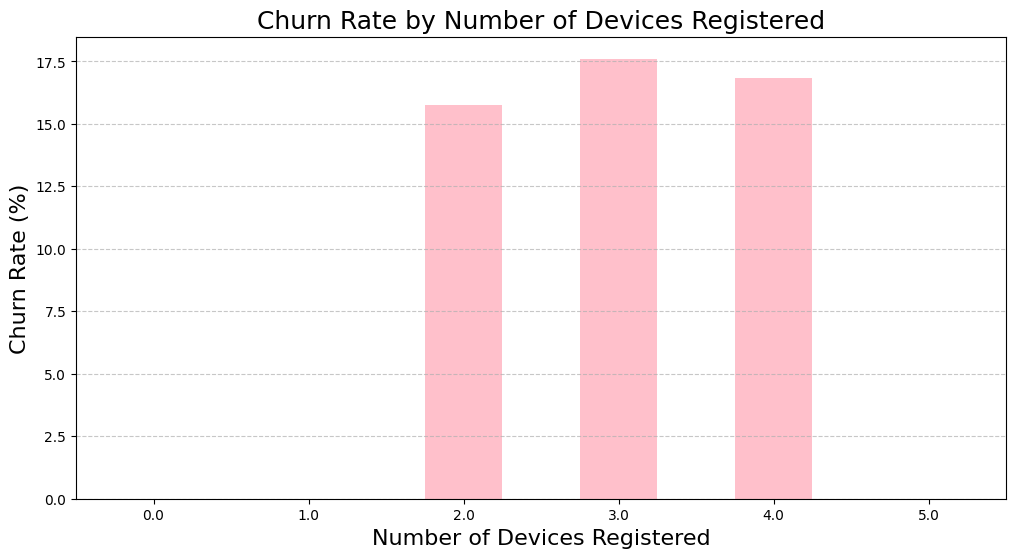

In [ ]:
device_churn_rate = EC.groupby('NumberOfDeviceRegistered')['Churn'].mean()*100

# creating a plot to visualize the relationship
plt.figure(figsize=(12,6))
hours_churn_rate.plot(kind='bar',color='pink')
plt.title('Churn Rate by Number of Devices Registered', size=18)
plt.xlabel('Number of Devices Registered',size=16)
plt.ylabel('Churn Rate (%)',size=16)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

##### What is the correlation between Preferred Order Category and Satisfaction Scores?

In [18]:
# Create preferred categories by satisfaction score
satisfaction_by_cat = EC[['PreferedOrderCat', 'SatisfactionScore']].groupby(['PreferedOrderCat', 'SatisfactionScore']).size().reset_index(name='Total')

# Calculate the total count for each category
total_by_cat = EC[['PreferedOrderCat', 'SatisfactionScore']].groupby(['PreferedOrderCat']).size().reset_index(name='CategoryTotal')

# Merge the DataFrames
satisfaction_by_cat = satisfaction_by_cat.merge(total_by_cat, on='PreferedOrderCat')

# Calculate the percentage for each row
satisfaction_by_cat['Percentage'] = (satisfaction_by_cat['Total'] / satisfaction_by_cat['CategoryTotal']) * 100

# Display the DataFrame randomly
satisfaction_by_cat.sample(n=5)

,PreferedOrderCat,SatisfactionScore,Total,CategoryTotal,Percentage
13,Laptop & Accessory,4,364,2050,17.756098
7,Grocery,3,108,410,26.341463
0,Fashion,1,168,826,20.338983
2,Fashion,3,244,826,29.539952
15,Mobile Phone,1,418,2080,20.096154


In [19]:
# Create a bar plot
fig = px.bar(satisfaction_by_cat,
             x='SatisfactionScore',
             y='Total',
             color='PreferedOrderCat',
             barmode='group',
             labels={'SatisfactionScore': 'Satisfaction Score', 'Total': 'Customers', 'PreferedOrderCat': 'Preferred Order Category'},
             title='Total Satisfaction Scores by Preferred Order Category',
             hover_data={'Percentage': ':.2f'})

# Update layout to add space between bars
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.update_layout(title={'x':0.45})

# Show the plot
fig.show()

- The majority of customers are satisfied with the services.
- However, the percentage of those rating 1 is still high.
- The reasons for the high percentage of dissatisfaction should be studied, and improvements should be implemented.

##### Is there a correlation between Users' Satisfaction and their Order Amount?

In [20]:
satisfaction_by_order = EC.groupby("SatisfactionScore").agg(
    TotalOrderAmount=("OrderAmountHikeFromlastYear", "sum"),
    TotalCustomers=("SatisfactionScore", "size")
).reset_index()
# Total number of customers
total_customers = EC['SatisfactionScore'].count()

# Percentage of customers in each group
satisfaction_by_order['CustomerPercentage'] = (satisfaction_by_order['TotalCustomers'] / total_customers) * 100

# Order per customer in the group
satisfaction_by_order['OrderPerCustomer'] = satisfaction_by_order['TotalOrderAmount'] / satisfaction_by_order['TotalCustomers']

# Display the DataFrame
satisfaction_by_order

,SatisfactionScore,TotalOrderAmount,TotalCustomers,CustomerPercentage,OrderPerCustomer
0,1,18587.0,1164,20.674956,15.968213
1,2,9251.0,586,10.408526,15.786689
2,3,26269.0,1698,30.159858,15.470554
3,4,16720.0,1074,19.076377,15.567970
4,5,17421.0,1108,19.680284,15.722924


- The order amount per customer and the customer percentage from the total are similar for satisfaction scores of 1 and 5. This indicates that there is no linear correlation between satisfaction score and order amount.
- It is important to learn why these customers are not satisfied.
The order amount suggests that products are selling well, so a study of the supply chain should be conducted.

##### What is the relationship between the amount of Coupon Used and the Order Amount?

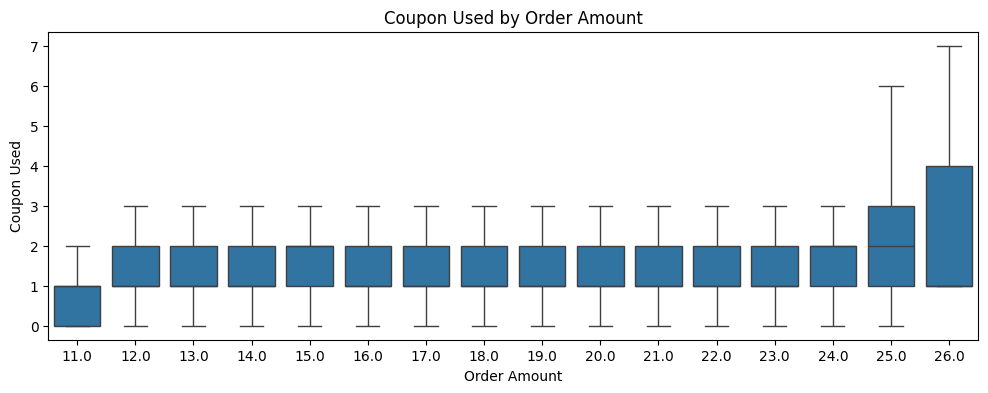

In [ ]:
# Create a box plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='OrderAmountHikeFromlastYear', y='CouponUsed', data=EC, showfliers=False,)

plt.xlabel('Order Amount')
plt.ylabel('Coupon Used')
plt.title('Coupon Used by Order Amount')

plt.show()

There is not a strong correlation between coupon use and order amount, as customers generally use 1-2 coupons on average, regardless of how much they order. Offering more personalized coupons could potentially increase revenue.

##### Is there a connection between the Day of the Last Order and Satisfaction Scores?

In [ ]:
satisfaction_by_days = EC.groupby('SatisfactionScore').agg(
    CustomerCount=('SatisfactionScore', 'size'),
    AvgDaysLastOrder=('DaySinceLastOrder', 'mean')
).reset_index()

# Display the DataFrame
satisfaction_by_days

,SatisfactionScore,CustomerCount,AvgDaysLastOrder
0,1,1164,4.408935
1,2,586,4.339590
2,3,1698,4.336867
3,4,1074,4.434823
4,5,1108,4.787004


- Ideally, the average days since the last order should be lower as the satisfaction score increases.
- However, the average across satisfaction scores remains the same.
- Strategies to motivate higher satisfaction scores should be considered.

##### Is there a connection between CashBack incentives and customer Complaints?

In [21]:
# Define bins
bins = list(range(0, 351, 25))
labels = [f'{i}-{i+25}' for i in bins[:-1]]

# A Series for the binning results
cashback_groups_series = pd.cut(EC['CashbackAmount'], bins=bins, labels=labels, right=False)

# Combine the Series with the DataFrame for grouping
combined_df = pd.DataFrame({'CashbackGroup': cashback_groups_series, 'Complain': EC['Complain']})
# Cashback groups by Churn
cashback_by_copmlain = combined_df.groupby(['CashbackGroup', 'Complain']).size().reset_index(name='Count')

# Total for each group
total_counts = cashback_by_copmlain.groupby('Complain')['Count'].sum().reset_index(name='TotalCount')

# Merge the DataFrames
cashback_by_copmlain = cashback_by_copmlain.merge(total_counts, on='Complain')

# Calculate percentage
cashback_by_copmlain['Percentage'] = (cashback_by_copmlain['Count'] / cashback_by_copmlain['TotalCount']) * 100

# Pivot the table to get a more readable format
cashback_by_copmlain_pivot = cashback_by_copmlain.pivot(index='CashbackGroup', columns='Complain', values=['Count', 'Percentage']).fillna(0).reset_index()
cashback_by_copmlain_pivot['Count'] = cashback_by_copmlain_pivot['Count'].astype(int)
cashback_by_copmlain_pivot['Percentage'] = cashback_by_copmlain_pivot['Percentage'].round(2)

cashback_by_copmlain_pivot

/tmp/ipykernel_117390/3578410498.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



CashbackGroup Count      Percentage       
Complain                   0    1          0      1
0                 0-25     4    1       0.10   0.06
1                25-50     4    1       0.10   0.06
2                50-75     0    1       0.00   0.06
3               75-100     0    1       0.00   0.06
4              100-125   292  140       7.25   8.73
5              125-150  1034  398      25.68  24.81
6              150-175  1159  432      28.79  26.93
7              175-200   600  240      14.90  14.96
8              200-225   304  119       7.55   7.42
9              225-250   182  100       4.52   6.23
10             250-275   138   69       3.43   4.30
11             275-300   193   62       4.79   3.87
12             300-325   116   40       2.88   2.49
13             325-350     0    0       0.00   0.00

In [22]:
# Complain column As boolean For readability
cashback_by_copmlain['Complain'] = cashback_by_copmlain['Complain'].astype(bool)

# Create a bar plot
fig = px.bar(cashback_by_copmlain,
             x='CashbackGroup',
             y='Percentage',
             color='Complain',
             barmode='group',
             color_discrete_map={False: 'lightgreen', True: 'red'},
             labels={'CashbackGroup': 'Cashback Group', 'Percentage': 'Percentage', 'Complain': 'Complain'},
             title='Cashback Percentage by Complain',
             hover_data={'CashbackGroup': True, 'Percentage': ':,.2f', 'Complain': False})  # Format Percentage to 2 decimals


fig.for_each_trace(lambda trace: trace.update(name='Yes' if trace.name == 'True' else 'No'))

# Update layout
fig.update_layout(
    xaxis_title='Cashback Groups',
    yaxis_title='Percentage',
    barmode='group',
    title={'x':0.45}
)

# Show plot
fig.show()

There is no linear correlation between cashback amount and complains. In both groups, the distribution of cashback shows similar trends, suggesting that cashback amount may not directly affect churn but could be an additional factor in customer engagement.

##### Do lower Satisfaction Scores correlate with more Complaints?

In [23]:
satisfaction_by_complain = EC.groupby('SatisfactionScore').agg(
    TotalCustomers=('SatisfactionScore', 'size'),
    TotalComplaints=('Complain', 'sum')
).reset_index()

# Calculate percentage
satisfaction_by_complain['ComplaintPercentage'] = (satisfaction_by_complain['TotalComplaints'] / satisfaction_by_complain['TotalCustomers']) * 100

In [24]:
blue_shades = ['#E3F2FD', '#90CAF9', '#42A5F5', '#1E88E5', '#1976D2']

# Create a histogram plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=satisfaction_by_complain['SatisfactionScore'],
    y=satisfaction_by_complain['ComplaintPercentage'],
    marker=dict(
        color=blue_shades
    )
))

# Update layout
fig.update_layout(
    title={
        'text': 'Complaints by Satisfaction Score',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Satisfaction Score',
    yaxis_title='Percentage',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(range=[0, 40]),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    bargap=0.15
)

# Show plot
fig.show()

- There is mild correlation between satisfaction score and complaints.
- Ideally, a higher satisfaction score would correspond to a lower percentage of complaints, reflecting the impact of satisfaction on complaints. Since the percentage of complaints remains high, analyzing complaints further is recommended.

##### Does Distance between the warehouse and home affect the Order Amount?

In [25]:
# Assuming df is your DataFrame
warehouse_to_home = EC['WarehouseToHome'].value_counts().reset_index()
warehouse_to_home.columns = ['WarehouseToHome', 'Count']
warehouse_to_home = warehouse_to_home.sort_values('WarehouseToHome')

# Create the Plotly figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=warehouse_to_home['WarehouseToHome'],
    y=warehouse_to_home['Count'],
    mode='markers',
    name='Data Points',
    marker=dict(color='darkblue', size=8, opacity=0.6)
))

# Add line plot
fig.add_trace(go.Scatter(
    x=warehouse_to_home['WarehouseToHome'],
    y=warehouse_to_home['Count'],
    mode='lines',
    name='Trend Line',
    line=dict(color='orange', width=2)
))

# Update layout
fig.update_layout(
    title='Warehouse to Home Distance by Total Amount',
    xaxis_title='Distance',
    yaxis_title='Total',
    xaxis=dict(
        range=[0, 40],
        dtick=2,
        showgrid=False
    ),
    yaxis=dict(showgrid=False),
    width=1000,
    height=600,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()

- The majority of customers are located between 6 to 16 km away. As the distance increases, the number of customers decreases.
- Distance appears to be a significant factor in customer decisions.
- Expanding warehouse locations to cover a larger area could potentially increase sales and revenue.

# Churn Prediction
## XGBoost Model

In [ ]:
!pip install xgboost -q

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [108]:
# Define features and target variable
X = EC.drop(['Churn', 'CustomerID'], axis=1)
y = EC['Churn']

In [109]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Preprocessing

In [110]:
# Categorical and Numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int', 'float']).columns
print(categorical_cols)
print(numerical_cols)

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')
Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [150]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    # ("standardize", StandardScaler()), # ignore if using SHAP
])

cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols),
])

In [151]:
# Preprocess the data
X_train_scaled = preprocessing.fit_transform(X_train)
X_test_scaled = preprocessing.transform(X_test)

In [154]:
onehot_encoder = preprocessing.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_cols).tolist()

# Gabungkan semua nama kolom
feature_names = (
    numerical_cols.tolist() +
    cat_feature_names +
    [col for col in X.columns if col not in numerical_cols.tolist() + categorical_cols.tolist()]  # Ubah ke list
)

# Buat DataFrame dengan nama kolom
X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)


### Train Model with CV

In [155]:
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    seed=42,
    random_state=42,
    tree_method='hist',
)
# full_pipeline_model = make_pipeline(preprocessing, xgb_clf)

In [156]:
from sklearn.model_selection import cross_val_score

f1_cv = cross_val_score(xgb_clf, X_train_df, y_train,
                              scoring="f1", cv=10)

In [157]:
pd.Series(f1_cv)

,0
0,0.957143
1,0.887324
2,0.869565
3,0.903704
4,0.854962
5,0.842857
6,0.902256
7,0.872180
8,0.920863
9,0.880597


### Full Train

In [158]:
xgb_clf.fit(X_train_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [159]:
# Make predictions
y_pred = xgb_clf.predict(X_test_df)

### Evaluation Model

In [160]:
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)
roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test_df)[:, 1])

print("-----------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')

Classification Report
-----------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1171
           1       0.95      0.93      0.94       237

    accuracy                           0.98      1408
   macro avg       0.97      0.96      0.96      1408
weighted avg       0.98      0.98      0.98      1408


-----------------------
Accuracy:    0.9801
Precision:   0.9524
Recall:      0.9283
F1 Score:    0.9402
ROC AUC:     0.9944


#### Plot the confusion matrix

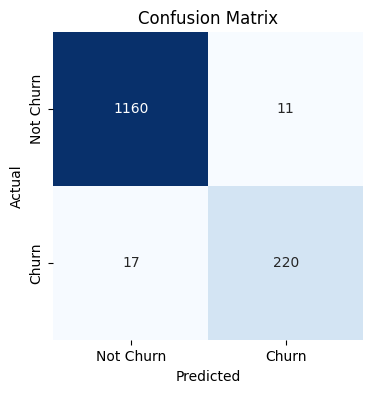

In [161]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Plot ROC curve

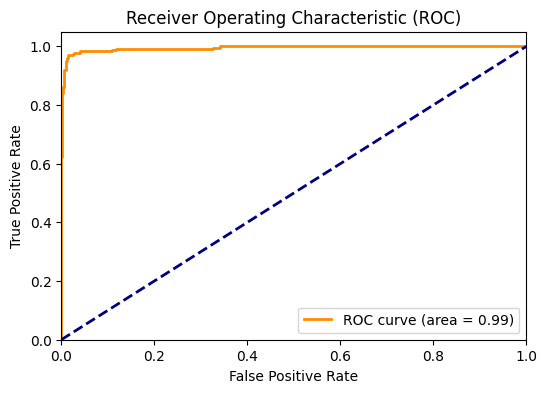

In [162]:
fpr, tpr, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test_df)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

<Figure size 1000x600 with 0 Axes>

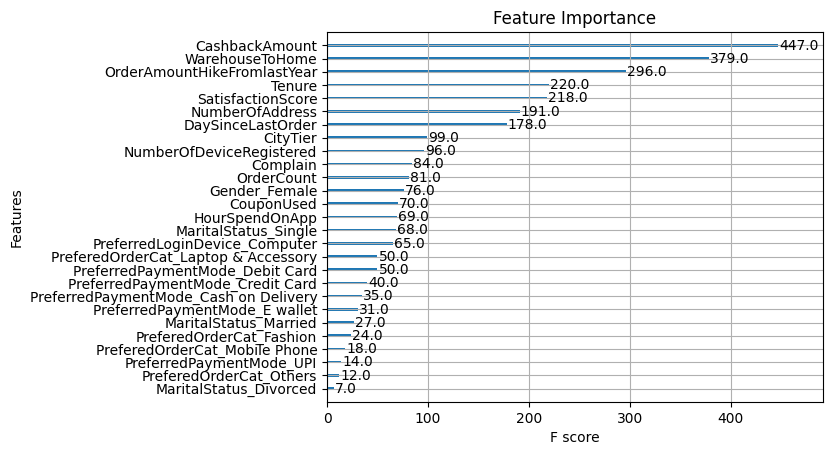

In [163]:
# Plot feature importance
plt.figure(figsize=(10, 6))
wt = plot_importance(xgb_clf, importance_type='weight')
plt.title('Feature Importance')
plt.show()

<Figure size 1000x600 with 0 Axes>

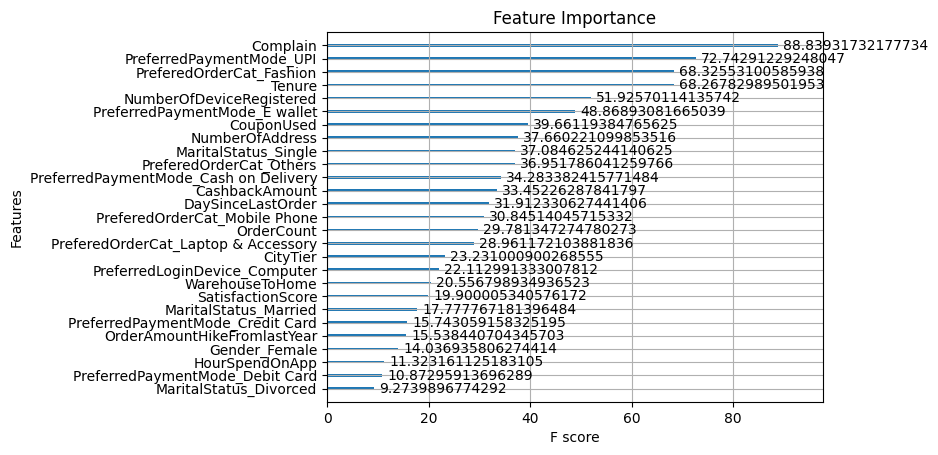

In [164]:
# Plot feature importance
plt.figure(figsize=(10, 6))
wt = plot_importance(xgb_clf, importance_type='cover')
plt.title('Feature Importance')
plt.show()

<Figure size 1000x600 with 0 Axes>

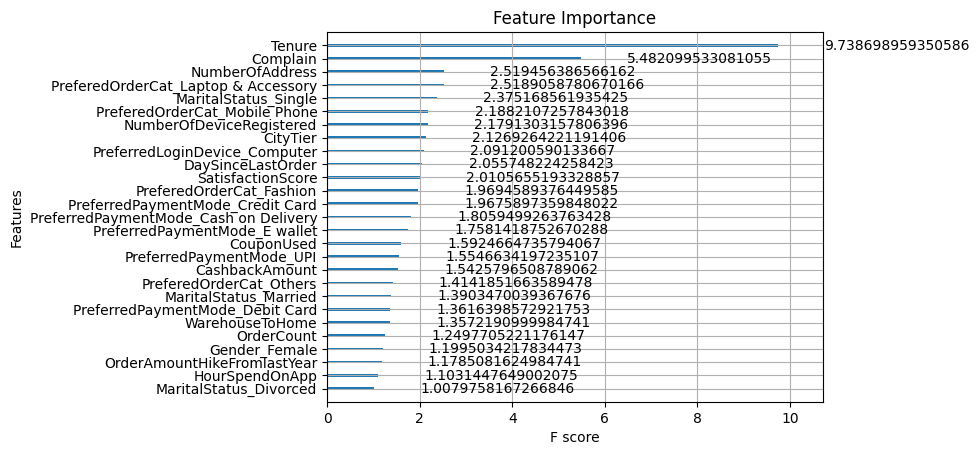

In [165]:
# Plot feature importance
plt.figure(figsize=(10, 6))
wt = plot_importance(xgb_clf, importance_type='gain')
plt.title('Feature Importance')
plt.show()

# XAI
In e-commerce churn prediction, XAI (Explainable AI) can be used to provide clear explanations of why a customer is predicted to churn. This explanation can help business analysts and customer retention teams understand how the model arrived at the prediction and help identify key factors influencing customer churn.

In [166]:
!pip install shap -q

In [167]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer(X_test_df)

In [168]:
shap.initjs()

In [169]:
indices_to_pull = X_test_df.head(2).index
test_instances = EC.loc[indices_to_pull]
test_instances

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5106,55107,1,4.0,Mobile Phone,3,32.0,E wallet,Male,3.0,5,Fashion,4,Single,4,1,13.0,2.0,2.0,3.0,215.94
2629,52630,0,12.0,Mobile Phone,1,16.0,Credit Card,Male,3.0,3,Fashion,3,Single,8,0,21.0,2.0,2.0,2.0,234.64


In [170]:
actual_labels = y_test.head(2)
predictions = xgb_clf.predict(X_test_df.head(2))

predictions_proba = xgb_clf.predict_proba(X_test_df.head(2))

data = {
    'Actual_Labels': actual_labels.values,
    'Predicted_Labels': predictions,
    'Probability': predictions_proba[:, 1] # Probability of class 1 (exit)
}

df_results = pd.DataFrame(data, index=actual_labels.index)

df_results

,Actual_Labels,Predicted_Labels,Probability
5106,1,1,0.990417
2629,0,0,0.000537


Feature values of 1st instance
------------------------------
 CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount
      55107      1     4.0         Mobile Phone         3             32.0             E wallet   Male             3.0                         5          Fashion                  4        Single                4         1                         13.0         2.0         2.0                3.0          215.94

Result of 1st instance
------------------------------
 Actual_Labels  Predicted_Labels  Probability
             1                 1     0.990417


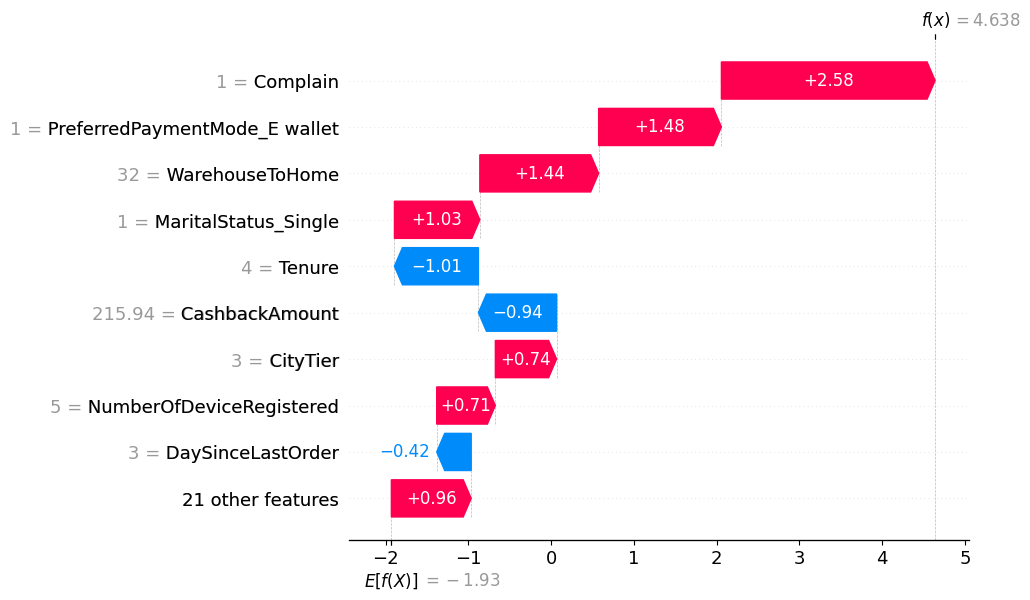

In [171]:
# 1st instance of test set.
print("Feature values of 1st instance")
print("------------------------------")
print(test_instances.head(1).to_string(index=False))
print()
print("Result of 1st instance")
print("------------------------------")
print(df_results.head(1).to_string(index=False))
shap.plots.waterfall(shap_values[0])

Feature values of 2nd instance
------------------------------
 CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount
      52630      0    12.0         Mobile Phone         1             16.0          Credit Card   Male             3.0                         3          Fashion                  3        Single                8         0                         21.0         2.0         2.0                2.0          234.64

Result of 2nd instance
------------------------------
 Actual_Labels  Predicted_Labels  Probability
             0                 0     0.000537


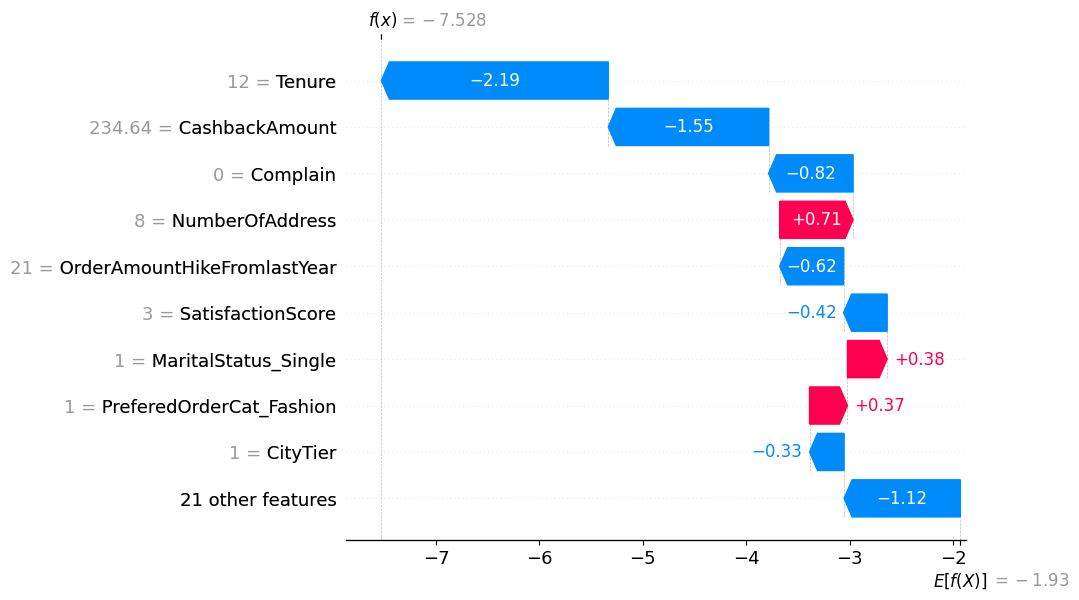

In [172]:
# 2st instance of test set.
print("Feature values of 2nd instance")
print("------------------------------")
print(test_instances.tail(1).to_string(index=False))
print()
print("Result of 2nd instance")
print("------------------------------")
print(df_results.tail(1).to_string(index=False))
shap.plots.waterfall(shap_values[1])

- Complaints: Customers who complain frequently tend to be more at risk of leaving. This indicates potential dissatisfaction that could drive them to leave the service. On the other hand, customers who never complain tend to stay. However, it is worth keeping an eye out as they could be passive and suddenly decide to quit without warning.

- Warehousehome: Warehouse location affects customer satisfaction, especially regarding delivery speed. Optimising distribution can help improve retention.

- E-Wallet Payment Methods: Customers using e-wallets are more sensitive to service quality. Failure to meet their expectations can increase the risk of churn.

- Tenure: Customers with a certain tenure (e.g., long-term subscriptions) are more likely to stay. This indicates higher loyalty compared to those with short-term subscriptions.

- Cashback: Cashback programmes are effective in encouraging customers to stay. This highlights the importance of an attractive promotional strategy for retention.



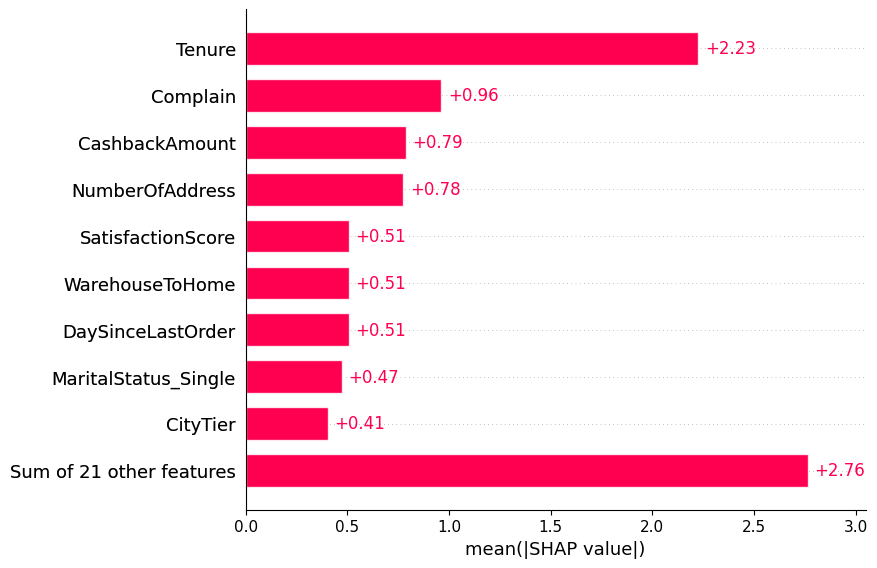

In [173]:
shap.plots.bar(shap_values)

- Tenure: Being the most important factor, it shows that subscription duration directly affects customer loyalty. Customers with longer tenure tend to be more loyal.

- Complaints: The frequency of complaints is an indicator of dissatisfaction. Customers who complain frequently have a higher risk of churn.

- Cashback: Cashback programmes are effective in retaining customers, demonstrating the importance of incentive strategies in maintaining loyalty.


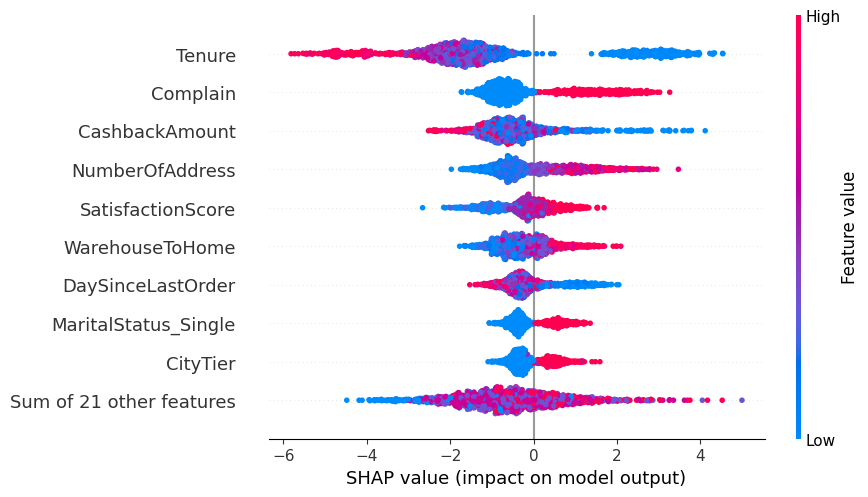

In [174]:
shap.plots.beeswarm(shap_values)

- The SHAP values for the tenure feature show a balanced distribution between red and blue colours. This means that both high (red) and low (blue) tenure customers have varying contributions to churn. That is, there is no clear tendency for either long or short tenure to cause customers to stay or quit.

- In the complain feature, the red colour is more dominant. This indicates that high SHAP values (large contribution to churn) are usually associated with customers who complain frequently. In this context, complaints are often a negative indicator, where the more complaints filed, the more likely the customer will churn.

- In contrast, for cashback features, the colour blue tends to dominate. This means that cashback programmes given to lower value (blue) customers tend to contribute to customer retention. Customers who do not receive much cashback or who get small cashback are more likely to stay, or conversely, large cashback may be given more frequently to satisfied customers.

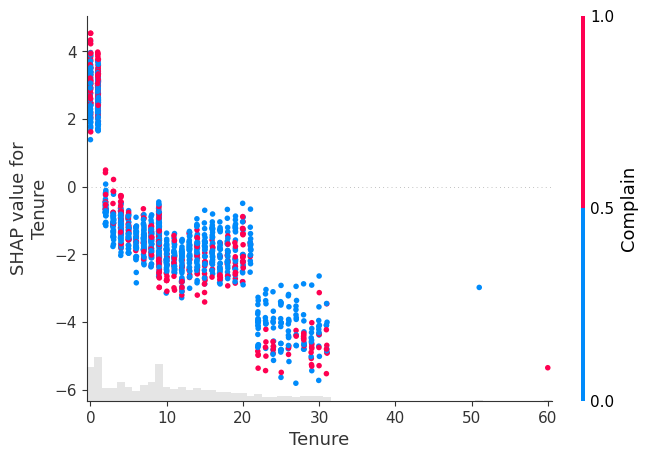

In [175]:
shap.plots.scatter(shap_values[:, "Tenure"], color=shap_values)

- Customers with low tenure are heavily influenced by bad experiences reflected in a high number of complaints, which increases the risk of churn.
- Customers with medium to long Tenure tend to be more loyal, especially if they rarely complain, but customers with long Tenure who complain frequently are also at risk of churn.
- A good retention strategy should focus on improving the customer experience early in the Tenure period and addressing complaints proactively to reduce the risk of churn.

# Recommendations
- Create a retention programme that specifically targets customers with short tenures (e.g., under 12 months). Focus on building loyalty from the start by offering personalised services, exclusive promotions, and enhanced user experience. For customers with longer tenures, create a loyalty programme that provides incentives such as additional discounts or priority access to new products. This will help retain them and prevent churn even though they may feel saturated.
- Implement a rapid response system and train your customer service team to resolve complaints effectively.
- Personalise cashback offers and conduct A/B testing to determine the optimal amount.